In [1]:
import pandas as pd
import numpy as np

In [2]:
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('dataset_bank.csv')

In [5]:
dataset['Attrition_Flag'] = dataset['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})


In [6]:
dataset.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
dataset.shape

(10127, 21)

In [8]:
y = dataset['Attrition_Flag']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [9]:
dataset.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
# Check columns list and missing values=No missing values
dataset.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
# Get unique count for each variable
dataset.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 47
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [13]:
#for col in dataset.columns:
  #  print ('\nFrequency of Categories for varible %s'%col)
  #  print (dataset[col].value_counts())

In [12]:
# Drop the column CLIENTNUM - unique value za site podatoci,dali moze da ni dade nekoja informacija za datasetot?                 
dataset = dataset.drop(["CLIENTNUM"], axis = 1)

In [14]:
# Check variable data types

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns
Attrition_Flag
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------
Category columns
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [15]:
categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
numeric_columns=[x for x in dataset.dtypes.index if is_numeric_dtype(dataset[x])]

print (categorical_columns)
print(numeric_columns)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


Text(0, 0.5, 'Frequency')

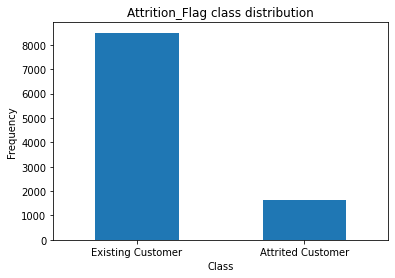

In [16]:
# class  Frequency

labels = ['Existing Customer','Attrited Customer']
classes = pd.value_counts(dataset['Attrition_Flag'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Attrition_Flag class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [18]:
#SMOTE-Unbalanced dataset

In [34]:
class_ExistingCustomer= dataset.query('Attrition_Flag == "Existing Customer"')
class_AttritedCustomer= dataset.query('Attrition_Flag == "Attrited Customer"')

In [19]:
#print (categorical_columns)
#print(numeric_columns)

#rows = 5
#columns = 3

#figure = plt.figure(figsize=(15,20))
#for idx, col in enumerate(numeric_columns, start=1):
   # col_values = [dataset[col].values]
 #   plt_seaborn = sns.distplot(col_values)
   
 #   cell = plt.subplot(5, 3, idx)
 #   plt_seaborn.plot()
 #   plt.title(col)


In [17]:
class_ExistingCustomer= dataset.query('Attrition_Flag == "Existing Customer"')
class_AttritedCustomer= dataset.query('Attrition_Flag == "Attrited Customer"')

<AxesSubplot:>

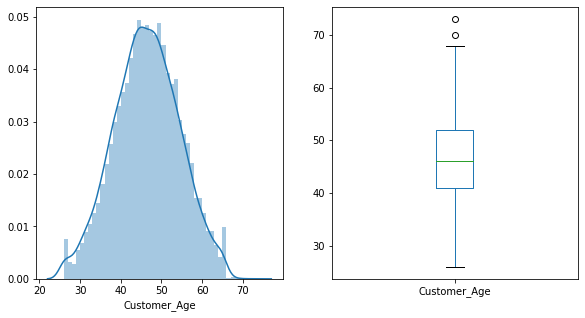

In [18]:
# distribution of Customer_Age
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Customer_Age'], label='Customer_Age')

plt.subplot(132)
dataset['Customer_Age'].plot(kind='box', label="Customer_Age")



In [19]:
###Dividing in age groups

dataset["Customer_Age"]=pd.cut(dataset.Customer_Age, [26,36,46,56,66,73])
#plt.figure(figsize=(10,5))
#sns.boxplot(x = "Customer_Age", y = "Total_Trans_Ct", data=dataset)
#dataset.groupby('Customer_Age')["Gender"].value_counts().unstack()


(36, 46]    4011
(46, 56]    3907
(26, 36]    1062
(56, 66]    1061
(66, 73]       8
Name: Customer_Age, dtype: int64

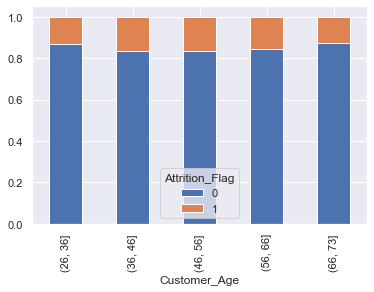

In [42]:
age= pd.crosstab(dataset['Customer_Age'], dataset['Attrition_Flag'])
age.div(age.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
age 
dataset['Customer_Age'].value_counts()
#dataset.groupby('Customer_Age')["Attrition_Flag"].value_counts().unstack()

#Customer age follows normal distribution , also approximately same proportion of churning customers across the age groups
#78% of the customers are in age range between 36-56y, so we have to pay attention to the behavior of the features in this particular range so we may find some pattern for better prediction

Attrition_Flag,0,1
Dependent_count,,
0,769,135
1,1569,269
2,2238,417
3,2250,482
4,1314,260
5,360,64


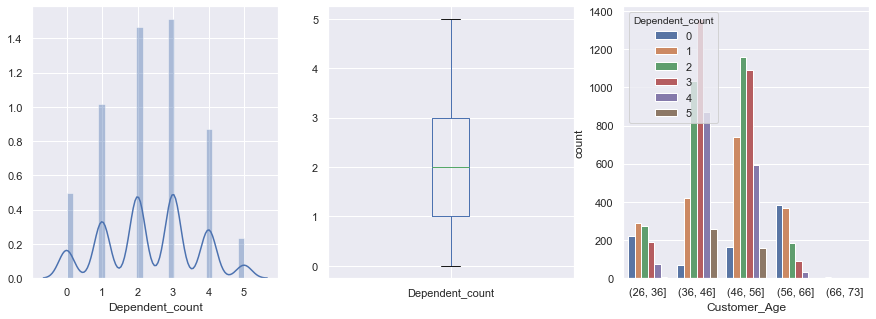

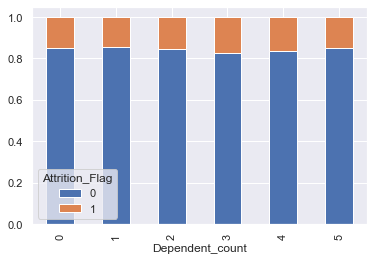

In [43]:
# distribution of Dependent_count(close family size)

plt.figure(figsize=(15,5))

plt.subplot(131)
sns.distplot(dataset['Dependent_count'], label='Dependent_count')

plt.subplot(132)
dataset['Dependent_count'].plot(kind='box', label="Dependent_count")

plt.subplot(133)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Dependent_count", data=dataset)

data= pd.crosstab(dataset['Dependent_count'], dataset['Attrition_Flag'])
data.div(data.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

data 

#The distribution of Dependent counts is fairly normally distributed.Аpproximately same proportion of churning customers , not depending on number of dependents (close family size)
#Customers in age groups 36-56 have 2-3 depndents

In [22]:
print(numeric_columns)

['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


F    5358
M    4769
Name: Gender, dtype: int64

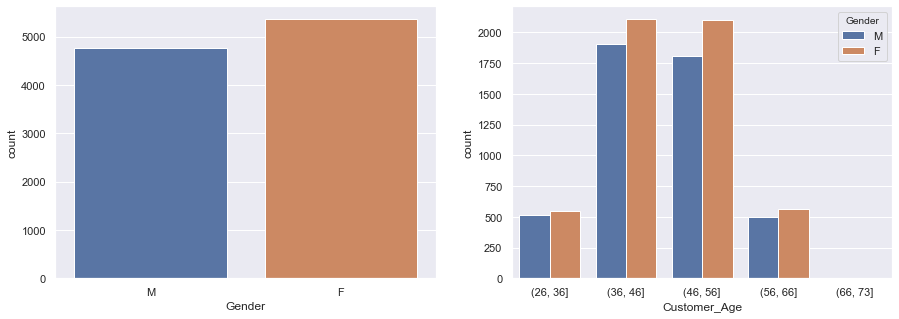

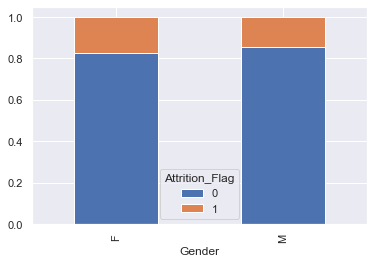

In [65]:
#Gender distribution
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Gender'])
plt.subplot(122)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Gender", data=dataset)
gender= pd.crosstab(dataset['Gender'], dataset['Attrition_Flag'])
gender.div(gender.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
dataset['Gender'].value_counts()
#The Bank has more female cusomers than male generally, and also divided by age groups
#Female has a higher but not significent  proportion of attrition compared to males.

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Attrition_Flag,,,,,,,
0,859,356,2641,1707,424,1250,1263
1,154,95,487,306,92,237,256


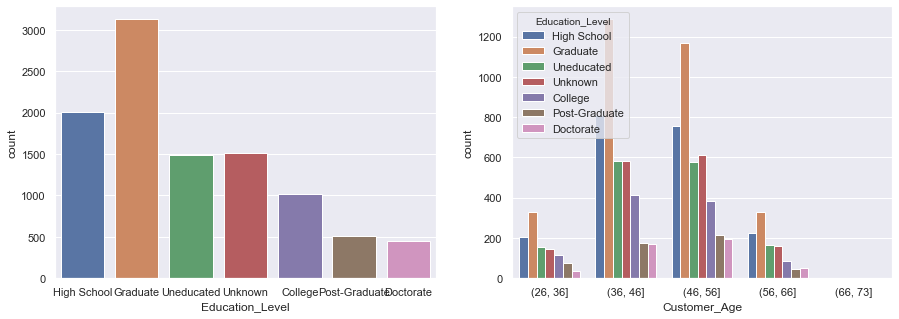

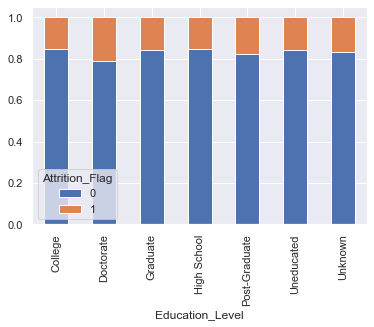

In [62]:
#Education_Level distribution
education= pd.crosstab(dataset['Education_Level'], dataset['Attrition_Flag'])
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(dataset['Education_Level'])

plt.subplot(122)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Education_Level", data=dataset)

education.div(education.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
dataset.groupby('Attrition_Flag')["Education_Level"].value_counts().unstack()

#Majority of clients have level of eduction high school and graduate, but we also have approxamatly same num of uneducated and unknown

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

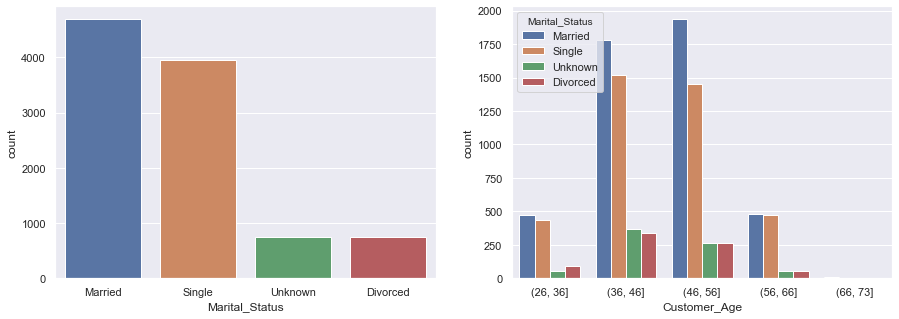

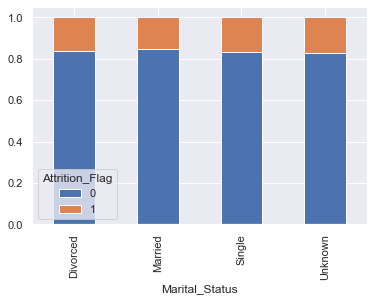

In [60]:
#Marital_Status distribution

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Marital_Status'])
plt.subplot(122)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Marital_Status", data=dataset)

marital= pd.crosstab(dataset['Marital_Status'], dataset['Attrition_Flag'])
marital.div(marital.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset['Marital_Status'].value_counts()

#Majority of the dataset is Married or Single, same proprtion of leaving

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Attrition_Flag,,,,,,
0,601,1519,1213,1293,2949,925
1,126,271,189,242,612,187


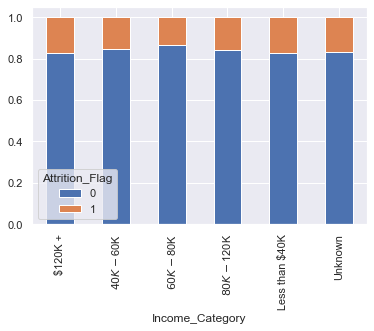

In [39]:
#Income_Category
income= pd.crosstab(dataset['Income_Category'], dataset['Attrition_Flag'])
income.div(income.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset.groupby('Attrition_Flag')["Income_Category"].value_counts().unstack()

In [35]:
# distribution of Card_Category-
dataset.groupby('Attrition_Flag')["Card_Category"].value_counts().unstack()

Card_Category,Blue,Gold,Platinum,Silver
Attrition_Flag,,,,
0,7917,95,15,473
1,1519,21,5,82


<AxesSubplot:xlabel='Card_Category'>

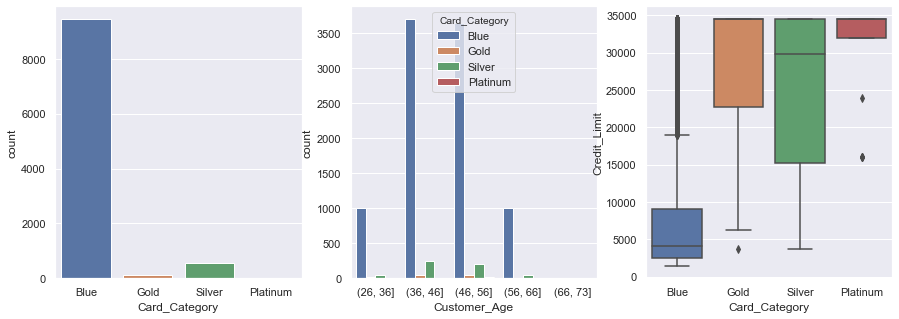

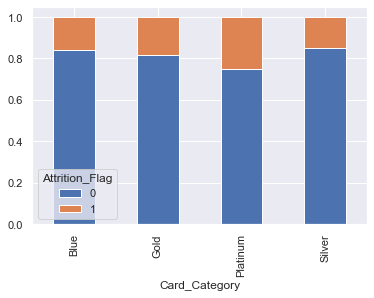

In [36]:
cards= pd.crosstab(dataset['Card_Category'], dataset['Attrition_Flag'])
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(dataset['Card_Category'])
plt.subplot(132)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Card_Category", data=dataset)

plt.subplot(133)
sns.boxplot(x = "Card_Category", y = "Credit_Limit", data=dataset)

cards.div(cards.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

#card = class_ExistingCustomer.Card_Category.value_counts()
#Majority of the data in Card_category is using Blue Card,but the proportion of attrition compared to other types of card is proper to the datset

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

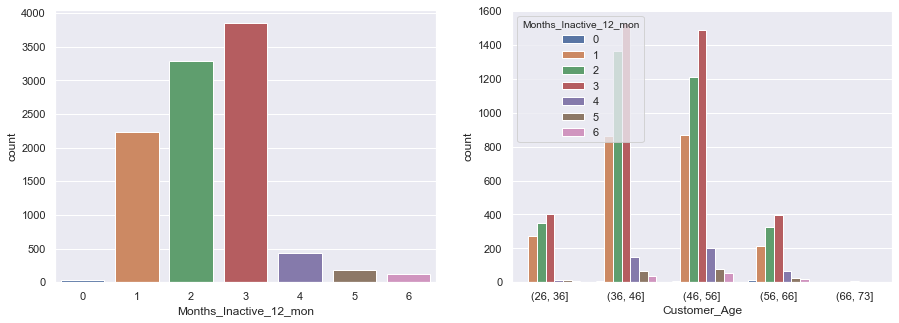

In [48]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Months_Inactive_12_mon'])

plt.subplot(122)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Months_Inactive_12_mon", data=dataset)


dataset['Months_Inactive_12_mon'].value_counts()
#Most od the clienst were inactive 1-3 months

Months_Inactive_12_mon,0,1,2,3,4,5,6
Attrition_Flag,,,,,,,
0,14,2133,2777,3020,305,146,105
1,15,100,505,826,130,32,19


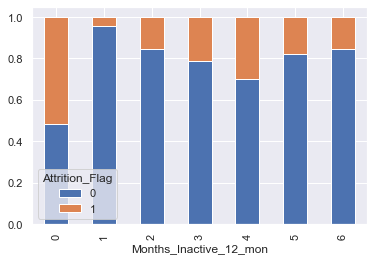

In [38]:
inactive= pd.crosstab(dataset['Months_Inactive_12_mon'], dataset['Attrition_Flag'])
inactive.div(inactive.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset.groupby('Attrition_Flag')["Months_Inactive_12_mon"].value_counts().unstack()

#Majority of the clients who abandoned the Bank were inactive approximately 4 months or less than a month, so here we have some diversity about inactive months and clients who left

Attrition_Flag,0,1
Total_Relationship_Count,,
1,677,233
2,897,346
3,1905,400
4,1687,225
5,1664,227
6,1670,196


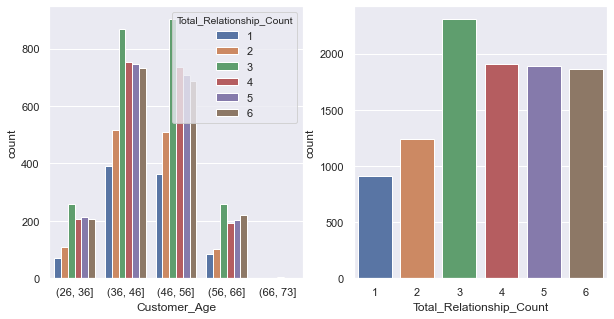

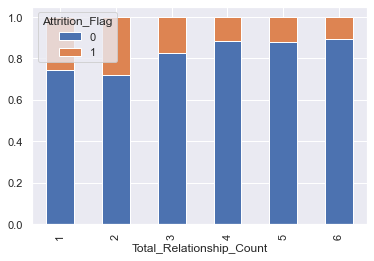

In [25]:
# distribution of Total_Relationship_Count-Total no. of products held by the customer
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Total_Relationship_Count", data=dataset)

plt.subplot(122)
sns.countplot(dataset['Total_Relationship_Count'])

products=pd.crosstab(dataset['Total_Relationship_Count'], dataset['Attrition_Flag'])
products.div(products.sum(axis=1), axis=0).plot(kind="bar", stacked=True)              
products 

#dataset.groupby('Customer_Age')["Total_Relationship_Count"].value_counts().unstack()

#Majority of the clients held 3 or more products
#Bank clients who held more products stayed in the Bank

Attrition_Flag,0,1
Contacts_Count_12_mon,,
0,392,7
1,1391,108
2,2824,403
3,2699,681
4,1077,315
5,117,59
6,0,54


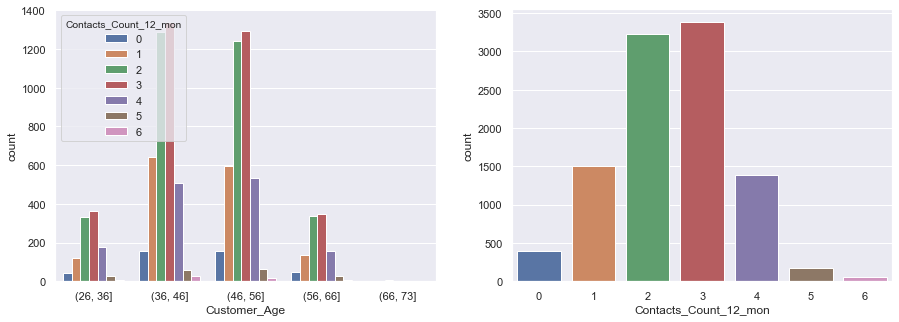

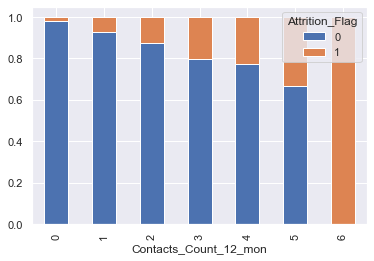

In [68]:
# distribution of Contacts_Count_12_mon- No. of Contacts in the last 12 months
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Contacts_Count_12_mon", data=dataset)

plt.subplot(122)
sns.countplot(dataset['Contacts_Count_12_mon'])

contacts=pd.crosstab(dataset['Contacts_Count_12_mon'], dataset['Attrition_Flag'])
contacts.div(contacts.sum(axis=1), axis=0).plot(kind="bar", stacked=True)              
contacts 

#The attrition class who has a higher No. of Contacts in the last 12 months compared to the existing customers class

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

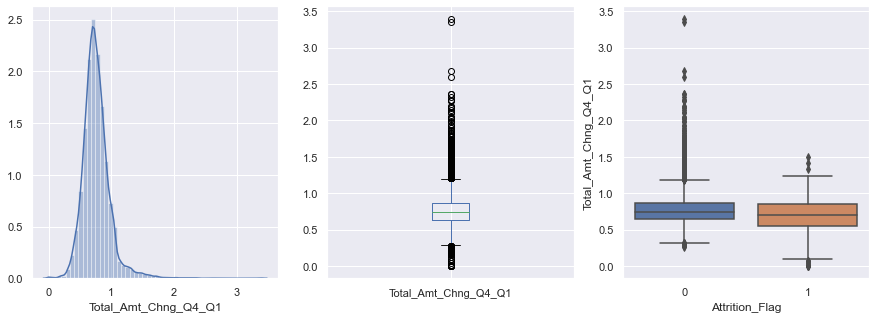

In [53]:
# distribution of Total_Amt_Chng_Q4_Q1(Change in Transaction Amount (Q4 over Q1))
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1'], label='Total_Amt_Chng_Q4_Q1')

plt.subplot(132)
dataset['Total_Amt_Chng_Q4_Q1'].plot(kind='box', label="Total_Amt_Chng_Q4_Q1")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Amt_Chng_Q4_Q1", data=dataset)


<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1_norm'>

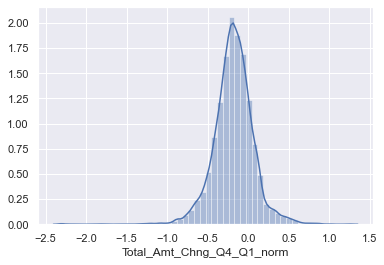

In [82]:
#Log Transform on skewed data
dataset = dataset.assign(Total_Amt_Chng_Q4_Q1_norm = np.log(dataset['Total_Amt_Chng_Q4_Q1']+0.1))
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1_norm'], label='Total_Amt_Chng_Q4_Q1_norm')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

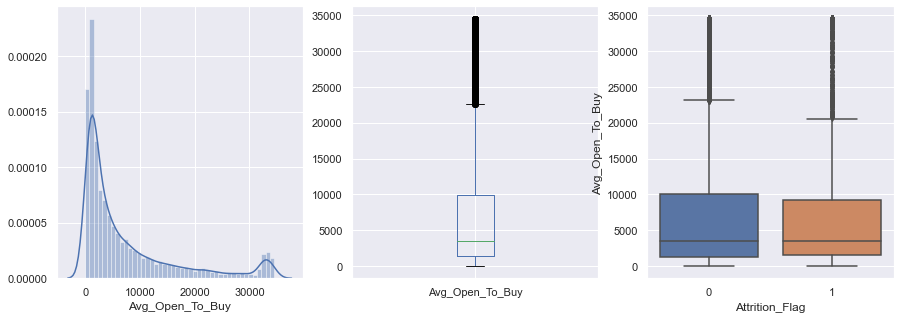

In [54]:
# distribution of Avg_Open_To_Buy(The difference between the credit limit assigned to a cardholder account and the present balance on the account)
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Avg_Open_To_Buy'], label='Avg_Open_To_Buy')

plt.subplot(132)
dataset['Avg_Open_To_Buy'].plot(kind='box', label="Avg_Open_To_Buy")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Avg_Open_To_Buy", data=dataset)

#Customers 

<AxesSubplot:xlabel='Avg_Open_To_Buy_norm'>

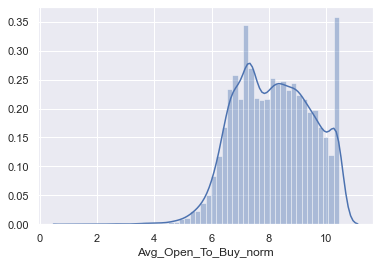

In [81]:
#Log Transform on skewed data
dataset = dataset.assign(Avg_Open_To_Buy_norm = np.log(dataset['Avg_Open_To_Buy']+0.1))
sns.distplot(dataset['Avg_Open_To_Buy_norm'], label='Avg_Open_To_Buy_norm')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

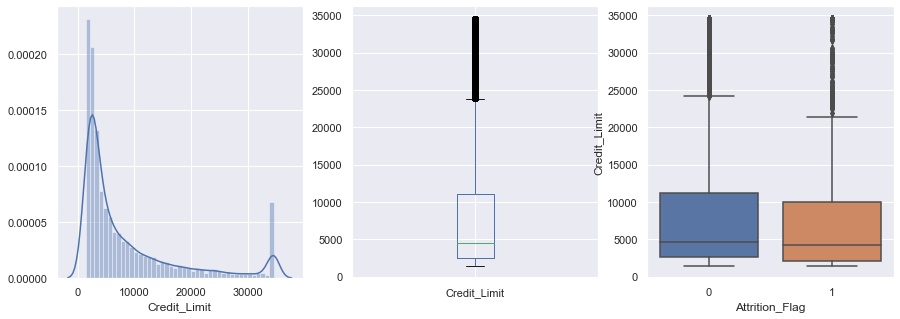

In [55]:
# distribution of Credit_Limit
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Credit_Limit'], label='Credit_Limit')

plt.subplot(132)
dataset['Credit_Limit'].plot(kind='box', label="Credit_Limit")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Credit_Limit", data=dataset)

#skew  to the left ,outliers,same data distribution of churning and existing customers,not significent influence of feature Credit limt to the class

<AxesSubplot:xlabel='Credit_Limit_norm'>

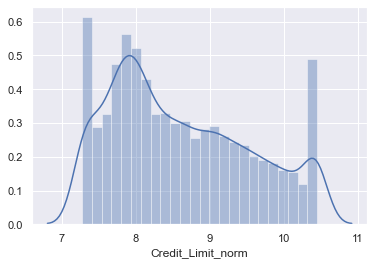

In [80]:
#Log Transform on skewed data
dataset = dataset.assign(Credit_Limit_norm = np.log(dataset['Credit_Limit']+0.1))
sns.distplot(dataset['Credit_Limit_norm'], label='Credit_Limit_norm')

<AxesSubplot:xlabel='Customer_Age', ylabel='Months_on_book'>

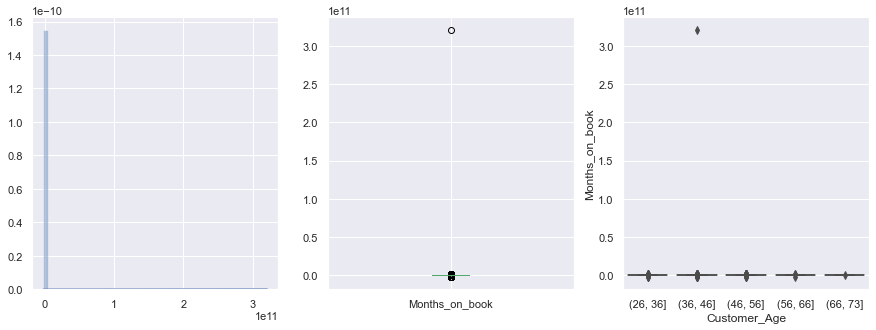

In [26]:
# distribution of Months_on_book
plt.figure(figsize=(15,5))
plt.subplot(131)
Months_on_book = [dataset['Months_on_book'].values]
sns.distplot(Months_on_book)

plt.subplot(132)
dataset['Months_on_book'].plot(kind='box', label="Months_on_book")

plt.subplot(133)
sns.boxplot(x = "Customer_Age", y = "Months_on_book", data=dataset)

#Outliers

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

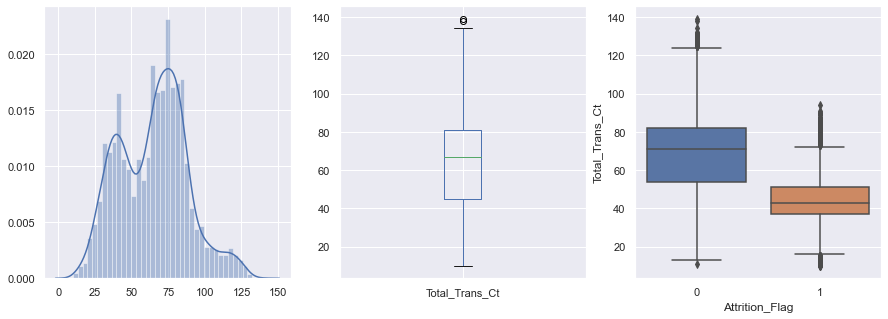

In [52]:
# distribution of Total_Trans_Ct(Total Transaction Count (Last 12 months))
plt.figure(figsize=(15,5))
plt.subplot(131)
Months_on_book = [dataset['Total_Trans_Ct'].values]
sns.distplot(Months_on_book)

plt.subplot(132)
dataset['Total_Trans_Ct'].plot(kind='box', label="Total_Trans_Ct")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Ct", data=dataset)
#Outliers
#we have some underlying groups in our data
#The attrition class has a lower total transaction count compared to the existing customers class

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

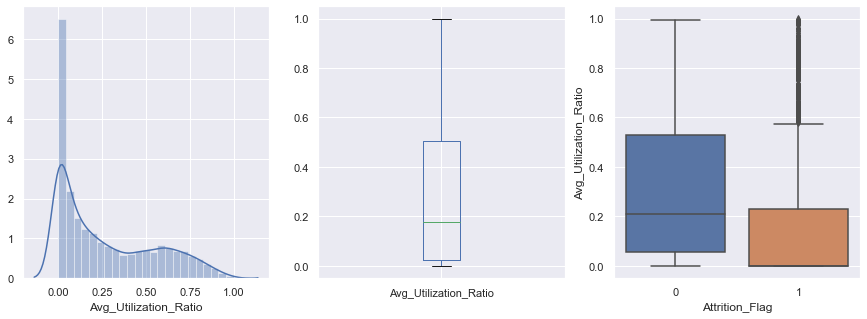

In [28]:
# distribution of Avg_Utilization_Ratio(credit utilization ratio is how much you owe on all your revolving accounts, such as credit cards, compared with your total available credit — expressed as a percentage. It's important because it's one of the biggest factors in your credit score.)
#Experts suggest using no more than 30% of your limits, and less is better. Charging too much on your cards, especially if you max them out, is associated with being a higher credit risk. That’s why running up your cards will lower your score
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Avg_Utilization_Ratio'], label='Avg_Utilization_Ratio')

plt.subplot(132)
dataset['Avg_Utilization_Ratio'].plot(kind='box', label="Avg_Utilization_Ratio")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Avg_Utilization_Ratio", data=dataset)

#Churning customers  most of them have Avg_Utilization_Ratio under 30%, but also significent proportion ( about 20%) are leaving the Bank with higher Avg_Utilization_Ratio
#Outliers

<AxesSubplot:xlabel='Avg_Utilization_Ratio_norm'>

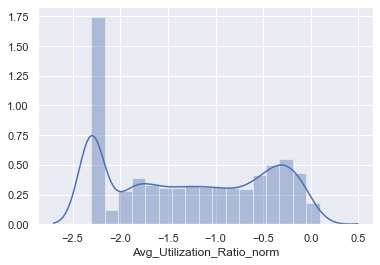

In [83]:
#Log Transform on skewed data
dataset = dataset.assign(Avg_Utilization_Ratio_norm = np.log(dataset['Avg_Utilization_Ratio']+0.1))
sns.distplot(dataset['Avg_Utilization_Ratio_norm'], label='Avg_Utilization_Ratio_norm')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

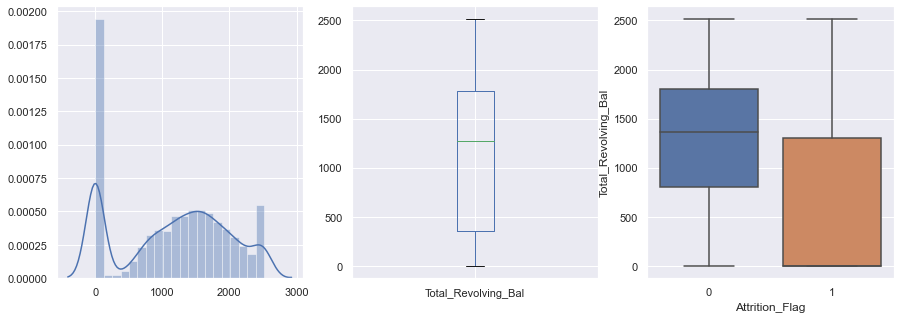

In [56]:
# distribution of Total_Revolving_Bal-Total Revolving Balance on the Credit Card
plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Revolving_Bal = [dataset['Total_Revolving_Bal'].values]
sns.distplot(Total_Revolving_Bal)

plt.subplot(132)
dataset['Total_Revolving_Bal'].plot(kind='box', label="Total_Revolving_Bal")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Revolving_Bal", data=dataset)

#The attrition class has a lower total revolving balance compared to the existing customers class

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

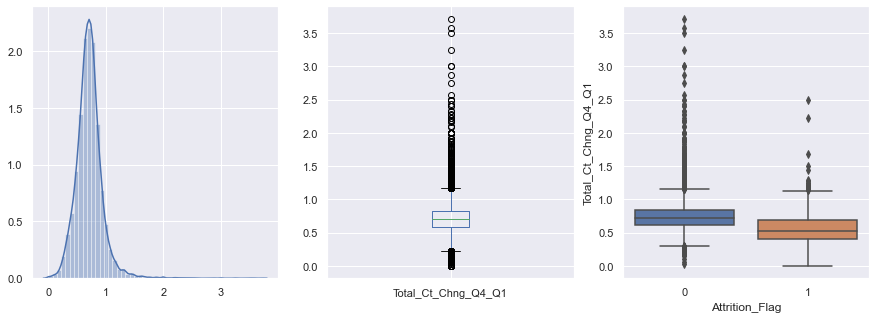

In [57]:
# distribution of Total_Ct_Chng_Q4_Q1-(Change in Transaction Count (Q4 over Q1))
plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Ct_Chng_Q4_Q1 = [dataset['Total_Ct_Chng_Q4_Q1'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1)
plt.subplot(132)
dataset['Total_Ct_Chng_Q4_Q1'].plot(kind='box', label="Total_Ct_Chng_Q4_Q1")
plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Ct_Chng_Q4_Q1", data=dataset)

#The attrition class has a lower Change in Transaction Count compared to the existing customers class

In [77]:
#Log Transform on skewed data
dataset = dataset.assign(Total_Ct_Chng_Q4_Q1_norm = np.log(dataset['Total_Ct_Chng_Q4_Q1']+0.1))

<AxesSubplot:>

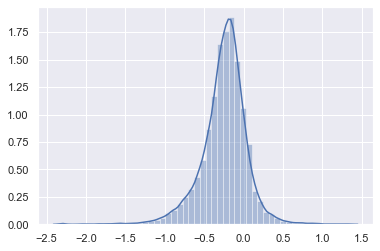

In [78]:
Total_Ct_Chng_Q4_Q1_norm = [dataset['Total_Ct_Chng_Q4_Q1_norm'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1_norm)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

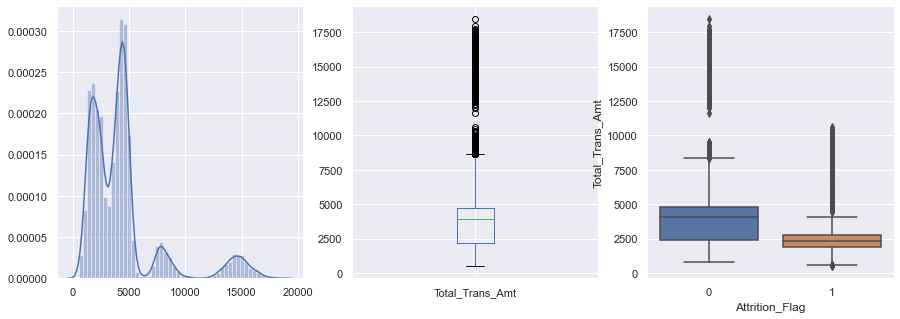

In [59]:
# distribution of Total_Trans_Amt-Total Transaction Amount (Last 12 months)
plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Trans_Amt = [dataset['Total_Trans_Amt'].values]
sns.distplot(Total_Trans_Amt)

plt.subplot(132)
dataset['Total_Trans_Amt'].plot(kind='box', label="Total_Trans_Amt")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Amt", data=dataset)

#The attrition class has a lower Total Transaction Amount compared to the existing customers class
#we have some underlying groups in our data

In [41]:
#calculate skew and sort
#The coefficient of skewness is a measure of asymmetry in the distribution.
#A positive skew indicates a longer tail to the right, while a negative skew indicates a longer tail to the left.
#A perfectly symmetric distribution, like the normal distribution, has a skew equal to zero.

skew_feats=dataset[numeric_columns].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'skew':skew_feats})
skewness

,skew
Months_on_book,100.290596
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Attrition_Flag,1.848449
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061
Total_Trans_Ct,0.153673


In [ ]:
#Encoding
#Normalization

In [87]:
# heat map of correlation of features
#correlation_matrix = dataset.corr()
#fig = plt.figure(figsize=(15,10))
#sns.heatmap(correlation_matrix,vmax=0.8,square = True)
#plt.show()

In [84]:
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_norm,Credit_Limit_norm,Avg_Open_To_Buy_norm,Total_Amt_Chng_Q4_Q1_norm,Avg_Utilization_Ratio_norm
0,0,"(36, 46]",M,3,High School,Married,$60K - $80K,Blue,39.0,5,...,1.335,1144,42,1.625,0.061,0.545227,9.448656,9.385478,0.361165,-1.826351
1,0,"(46, 56]",F,5,Graduate,Single,Less than $40K,Blue,44.0,6,...,1.541,1291,33,3.714,0.105,1.338679,9.018708,8.908167,0.495306,-1.584745
2,0,"(46, 56]",M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,...,2.594,1887,20,2.333,0.000,0.889125,8.136840,8.136840,0.991027,-2.302585
3,0,"(36, 46]",F,4,High School,Unknown,Less than $40K,Blue,34.0,3,...,1.405,1171,20,2.333,0.760,0.889125,8.105640,6.679725,0.408793,-0.150823
4,0,"(36, 46]",M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,...,2.175,816,28,2.500,0.000,0.955511,8.458737,8.458737,0.821980,-2.302585


In [74]:
from sklearn.model_selection import train_test_split


x = dataset[numeric_columns]
x=x.drop(['Customer_Age','Attrition_Flag'], axis=1)
y = dataset['Attrition_Flag']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [85]:
#x.head()

In [76]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth=15., 
                              min_samples_leaf=5, 
                              max_leaf_nodes=50, 
                              criterion='entropy')

tree.fit(X_train, y_train)
print('The accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))

print('Decision tree score on the test set: {:.2f}'.format(tree.score(X_test, y_test)))

The accuracy on the training subset: 0.959
Decision tree score on the test set: 0.95
